In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import pickle
from scipy.sparse import load_npz
import os

# Baseline


Models to Compare

1. Logistic Regression (text + tabular features, class weights)
2. Random Forest Classifier (tabular + text)
3. Multinomial Naive Bayes (text only, works well for TF-IDF)

**What this pipeline does**

1. Trains 3 models on the data:

* Logistic Regression (text + tabular, class weights)

* Random Forest (text + tabular, class weights)

* Multinomial Naive Bayes (text only)

2. Evaluates F1 macro, Accuracy, Classification Report, Confusion Matrix for each.

3. Stores results in a comparison table, sorted by F1 macro → makes it easy to pick the best model.

In [4]:
import pickle
from scipy.sparse import load_npz
from scipy.sparse import hstack
import os

# Папка, де збережені дані
data_dir = "/content/"

# Табличні ознаки
with open(os.path.join(data_dir, "X_tab_train.pkl"), "rb") as f:
    X_tab_train = pickle.load(f)
with open(os.path.join(data_dir, "X_tab_val.pkl"), "rb") as f:
    X_tab_val = pickle.load(f)
with open(os.path.join(data_dir, "X_tab_test.pkl"), "rb") as f:
    X_tab_test = pickle.load(f)

# Текстові ознаки (розріджена матриця)
X_text_train = load_npz(os.path.join(data_dir, "X_text_train.npz"))
X_text_val = load_npz(os.path.join(data_dir, "X_text_val.npz"))
X_text_test = load_npz(os.path.join(data_dir, "X_text_test.npz"))

# Мітки
with open(os.path.join(data_dir, "y_train.pkl"), "rb") as f:
    y_train = pickle.load(f)
with open(os.path.join(data_dir, "y_val.pkl"), "rb") as f:
    y_val = pickle.load(f)
with open(os.path.join(data_dir, "y_test.pkl"), "rb") as f:
    y_test = pickle.load(f)


# Комбіновані ознаки для LR та RF

X_train_combined = hstack([X_tab_train, X_text_train])
X_val_combined = hstack([X_tab_val, X_text_val])
X_test_combined = hstack([X_tab_test, X_text_test])

print("Data loaded successfully!")
print("Train shape (combined):", X_train_combined.shape)
print("Validation shape (combined):", X_val_combined.shape)

Data loaded successfully!
Train shape (combined): (1786, 5005)
Validation shape (combined): (316, 5005)



=== Logistic Regression ===


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 macro: 0.573
Accuracy: 0.896

Classification Report:
              precision    recall  f1-score   support

         neg       0.72      0.83      0.77        59
         neu       0.00      0.00      0.00         8
         pos       0.96      0.94      0.95       249

    accuracy                           0.90       316
   macro avg       0.56      0.59      0.57       316
weighted avg       0.89      0.90      0.89       316



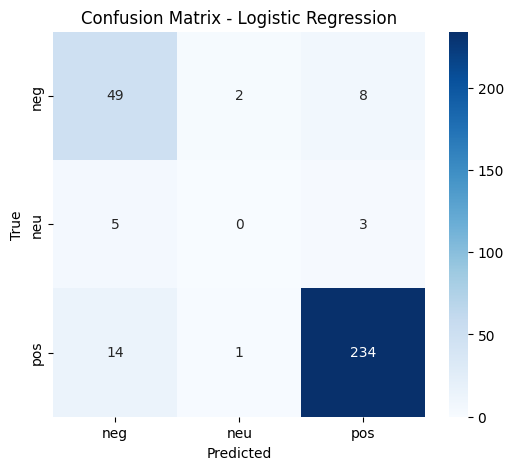


=== Random Forest ===
F1 macro: 0.564
Accuracy: 0.896

Classification Report:
              precision    recall  f1-score   support

         neg       0.79      0.71      0.75        59
         neu       0.00      0.00      0.00         8
         pos       0.92      0.97      0.94       249

    accuracy                           0.90       316
   macro avg       0.57      0.56      0.56       316
weighted avg       0.87      0.90      0.88       316



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


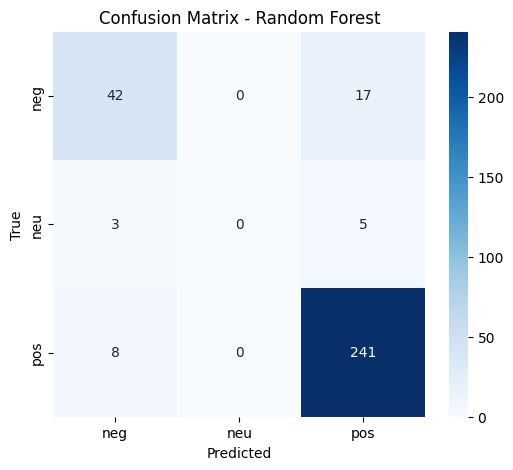


=== Multinomial NB ===
F1 macro: 0.584
Accuracy: 0.915

Classification Report:
              precision    recall  f1-score   support

         neg       0.91      0.71      0.80        59
         neu       0.00      0.00      0.00         8
         pos       0.91      0.99      0.95       249

    accuracy                           0.91       316
   macro avg       0.61      0.57      0.58       316
weighted avg       0.89      0.91      0.90       316



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


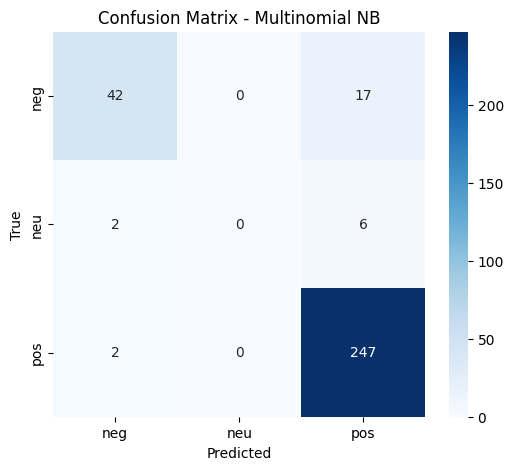


=== Model Comparison ===


,F1_macro,Accuracy
Multinomial NB,0.583943,0.914557
Logistic Regression,0.573007,0.895570
Random Forest,0.563802,0.895570


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to store models and results
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42),
    "Multinomial NB": MultinomialNB()
}

# Store evaluation metrics
results = {}

# 1. Train & Evaluate
for name, model in models.items():
    print(f"\n=== {name} ===")

    # Train
    if name == "Multinomial NB":
        # NB works only with TF-IDF/text features
        model.fit(X_text_train, y_train)
        y_pred = model.predict(X_text_val)
    else:
        # LR & RF use combined features
        model.fit(X_train_combined, y_train)
        y_pred = model.predict(X_val_combined)

    # Metrics
    f1_macro = f1_score(y_val, y_pred, average="macro")
    acc = accuracy_score(y_val, y_pred)
    results[name] = {"F1_macro": f1_macro, "Accuracy": acc}

    print("F1 macro:", round(f1_macro,3))
    print("Accuracy:", round(acc,3))
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred, target_names=["neg","neu","pos"]))

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["neg","neu","pos"], yticklabels=["neg","neu","pos"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


# 2. Compare results
results_df = pd.DataFrame(results).T.sort_values(by="F1_macro", ascending=False)
print("\n=== Model Comparison ===")
display(results_df)

**Multinomial NB**

F1_macro найвищий (0.584), Accuracy 0.915

Добре розпізнає позитивні та негативні відгуки, але практично не визначає нейтральні (support=8).
Це робить її найкращою базовою моделлю для цього набору даних.

**Logistic Regression**

F1_macro 0.573, Accuracy 0.896

Позитивні відгуки майже ідеально класифіковані, негативні трохи гірше, нейтральні — практично не класифікуються.

**Random Forest**

F1_macro 0.564, Accuracy 0.896
Схожий результат на LR, але трохи нижчий F1_macro.
Також проблема з нейтральними відгуками.


Multinomial NB показує найкращий баланс між класами за F1_macro → рекомендується як baseline модель.
LR і RF дають схожі результати, але трохи гірше по макро F1.
Проблема з класом neu (нейтральні відгуки) присутня у всіх моделях → можливо потрібно додатково балансувати клас або додавати фічі.